In [63]:
# Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# Machine Learning
## Feature Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## ML Models Diffrent Algorithms
from sklearn.model_selection  import cross_val_score
from sklearn.preprocessing import StandardScaler

import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,confusion_matrix, mean_squared_error,accuracy_score, f1_score,classification_report


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
data = pd.read_excel('train_file.xlsx')
data_test = pd.read_excel('test_file.xlsx')

In [65]:
df = data.copy()

In [66]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,0,nonexistent,no


In [67]:
data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome
0,34,services,married,high.school,no,no,no,telephone,may,thu,214,4,0,nonexistent
1,29,blue-collar,single,basic.9y,no,no,no,cellular,jul,thu,190,1,0,nonexistent
2,35,admin.,single,high.school,no,no,no,cellular,may,wed,152,2,0,nonexistent
3,60,admin.,divorced,high.school,no,yes,no,cellular,jul,fri,179,1,0,nonexistent
4,45,management,married,university.degree,no,no,no,telephone,may,wed,105,2,0,nonexistent


In [68]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
32905,30,management,single,university.degree,no,no,no,cellular,nov,thu,197,5,1,failure,no
32906,34,blue-collar,married,high.school,no,yes,no,telephone,jun,mon,562,3,0,nonexistent,no
32907,33,technician,married,professional.course,no,yes,yes,cellular,aug,mon,61,1,0,nonexistent,no
32908,58,unemployed,married,basic.9y,no,no,no,telephone,jun,mon,266,2,0,nonexistent,no
32909,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,64,1,0,nonexistent,no


## Data Understanding
shape

Info

describe

unique

## Data Preprocessing & Exploration
Identify Duplicates

Identify & Treat Missing values

Handling Data type

Data Exploration using plots

Observations

Outlier Identification & Treatment 

Handling Categorical Variables

Outiers detection & Treatment

Skewness & Kurtosis



## Model

KNN Classification

Logistic Regression

Random Forest Classifier

XGBoost Classifier

Model Optimisation

Prediction

## Model Evaluation
Confusion matrix
ROC

## Feature Selection
Correlation matrix

Tree Based methods

VIF

# Data Understanding

Check the shape

In [4]:
print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The Dataset has 32910 rows and 15 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32910 non-null  int64 
 1   job          32910 non-null  object
 2   marital      32910 non-null  object
 3   education    32910 non-null  object
 4   default      32910 non-null  object
 5   housing      32910 non-null  object
 6   loan         32910 non-null  object
 7   contact      32910 non-null  object
 8   month        32910 non-null  object
 9   day_of_week  32910 non-null  object
 10  duration     32910 non-null  int64 
 11  campaign     32910 non-null  int64 
 12  previous     32910 non-null  int64 
 13  poutcome     32910 non-null  object
 14  y            32910 non-null  object
dtypes: int64(4), object(11)
memory usage: 3.8+ MB


Data contain 4 Numerical ,11 Categorical values.

No variable contains null values (empty or missing value).

# Describe the Dataset

Get the total counts, mean, std and other valuable descriptions using describe()

In [154]:
df.describe()

,age,duration,campaign,previous
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810
std,10.402948,259.070260,2.753336,0.499211
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


In [174]:
#check the each variable uniqueness

df.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
previous          8
poutcome          3
y                 2
dtype: int64

Import and analyse dataset with automatic EDA library - sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
#analyzing the dataset
customer_report = sv.analyze(df)
#display the report
customer_report.show_html('Customer.html')

# Separating Numeric & categorical data

In [155]:
#Categorical data in dataset
categorical_data = df.select_dtypes(exclude = np.number)
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no


In [156]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [160]:
for feature in categorical_data:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


Observation:

there are 10 categorical features and 1 target variable

feature job and month has highest number of categorical values

# Categorical Feature Distribution

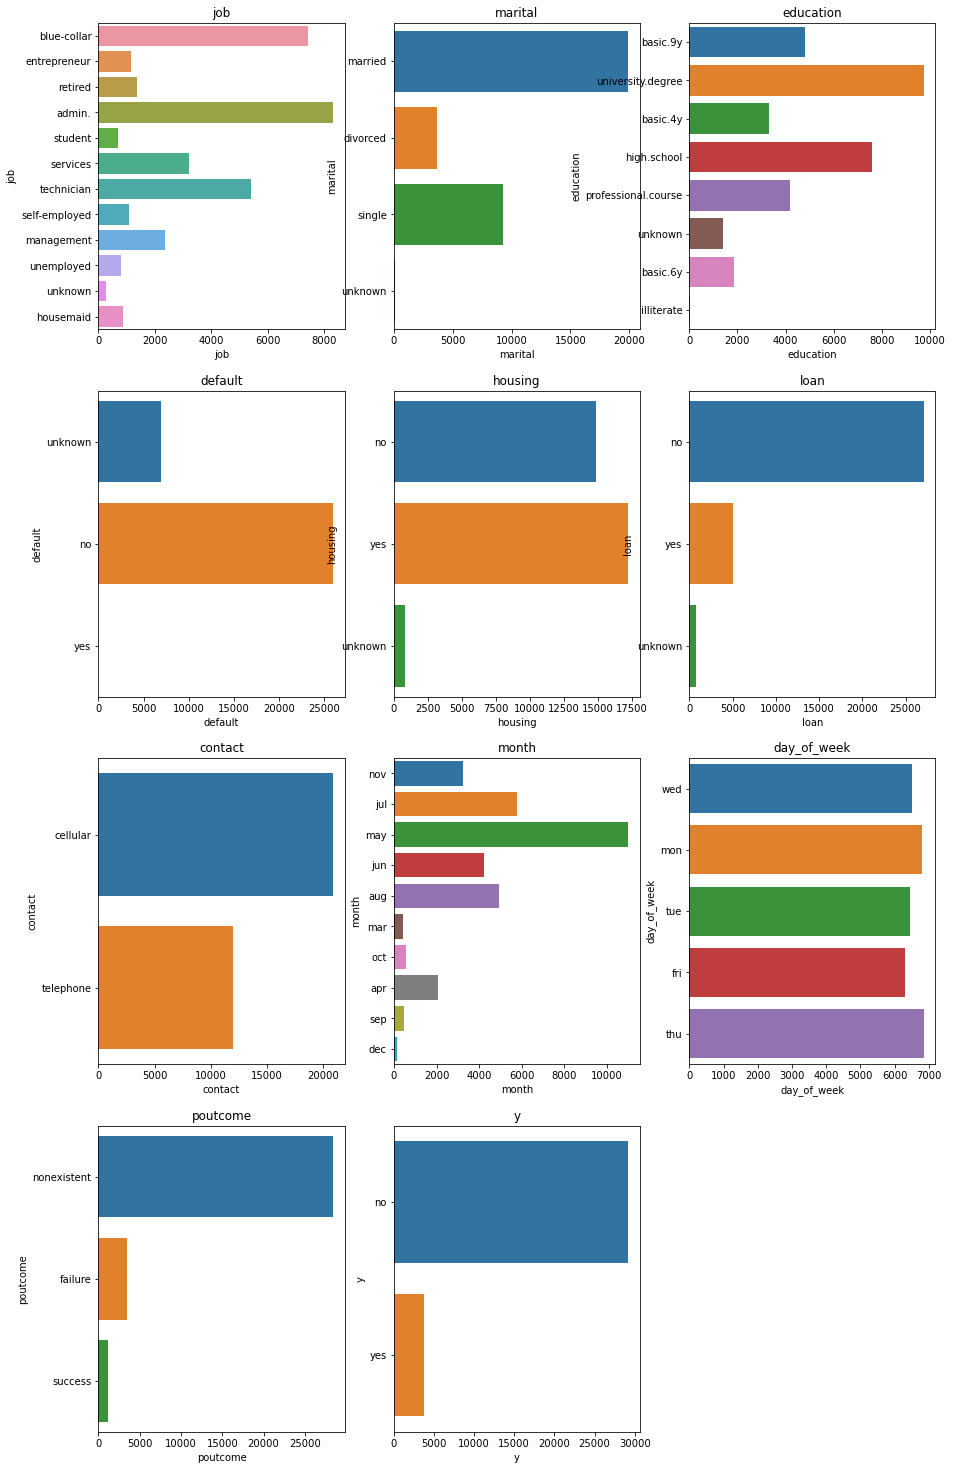

In [158]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

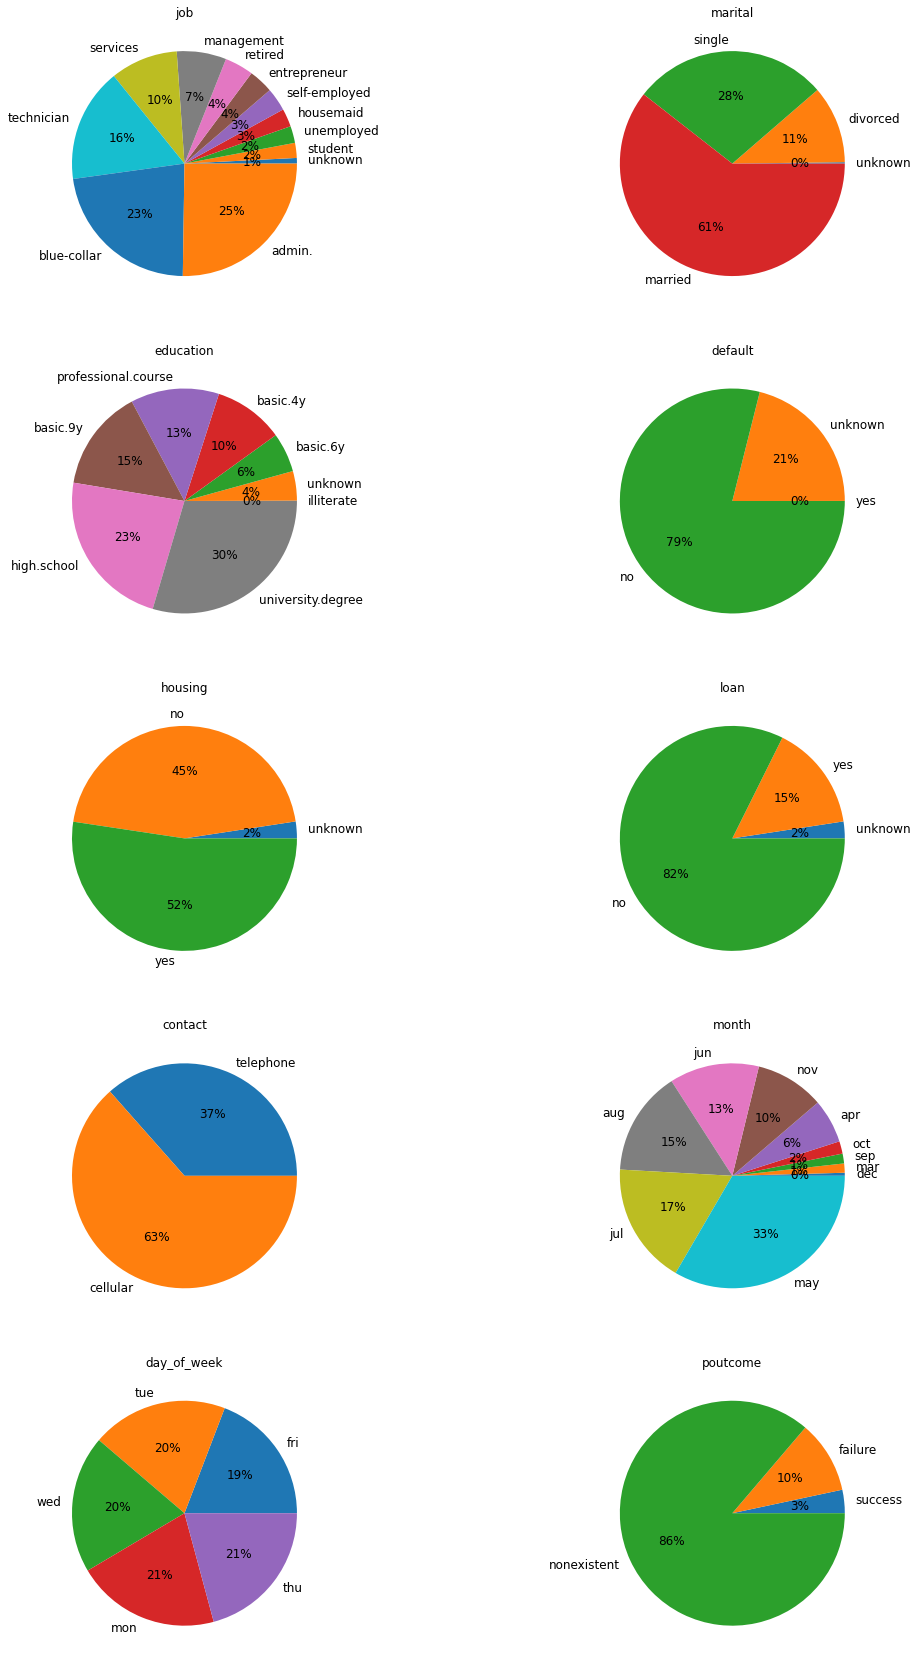

In [159]:
# pie chart to see the proportion of categorical variables
fig, axes = plt.subplots(5, 2, figsize=(18,30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[cat_columns]):
    df[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=12)
    axes[i].set_ylabel('')

Observations

More number of admin, blue collar and technician customers but less number of students, enterprenuer, retired

Maximum number of married customers

Most customers education levels are university degree and high school

Most cutomers are not defaulted in past

More than 50% have taken housing loan

More than 80% have taken personal loan

More than 60% customers are contacted via cellular mode

Customers are contacted from March to Dec. And most of the customers were contacted in the month of May

Customers were not contacted on Dec month, and very less in March, Sep, Oct months

Customers were contacted each day uniformely throughout all weekdays

Non existent potcome are 86%

# Relation between Categorical Feature and Target feature

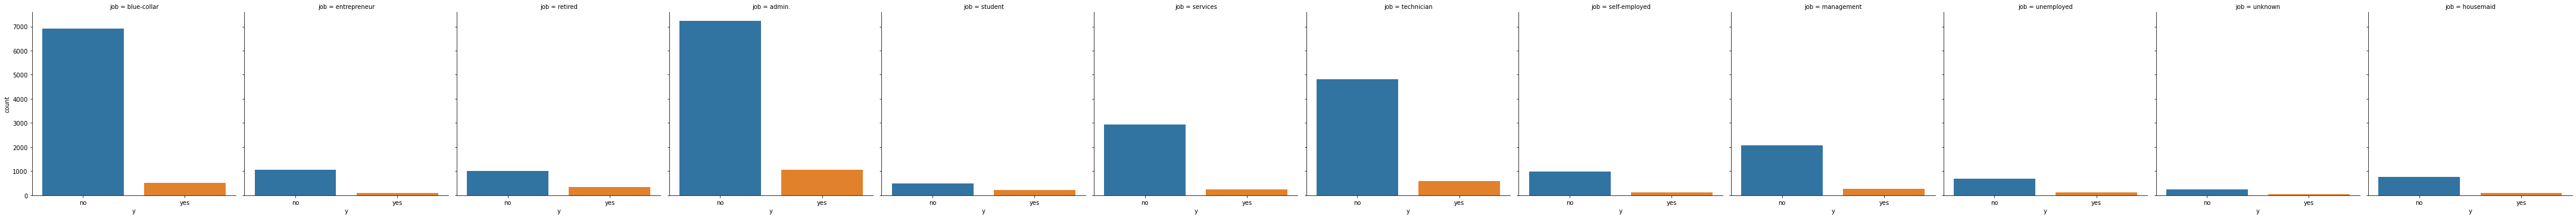

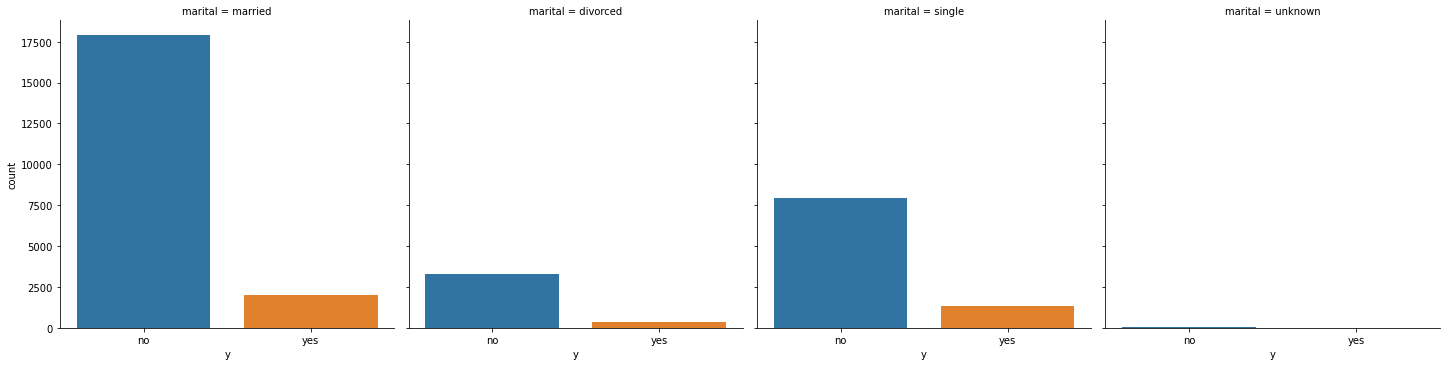

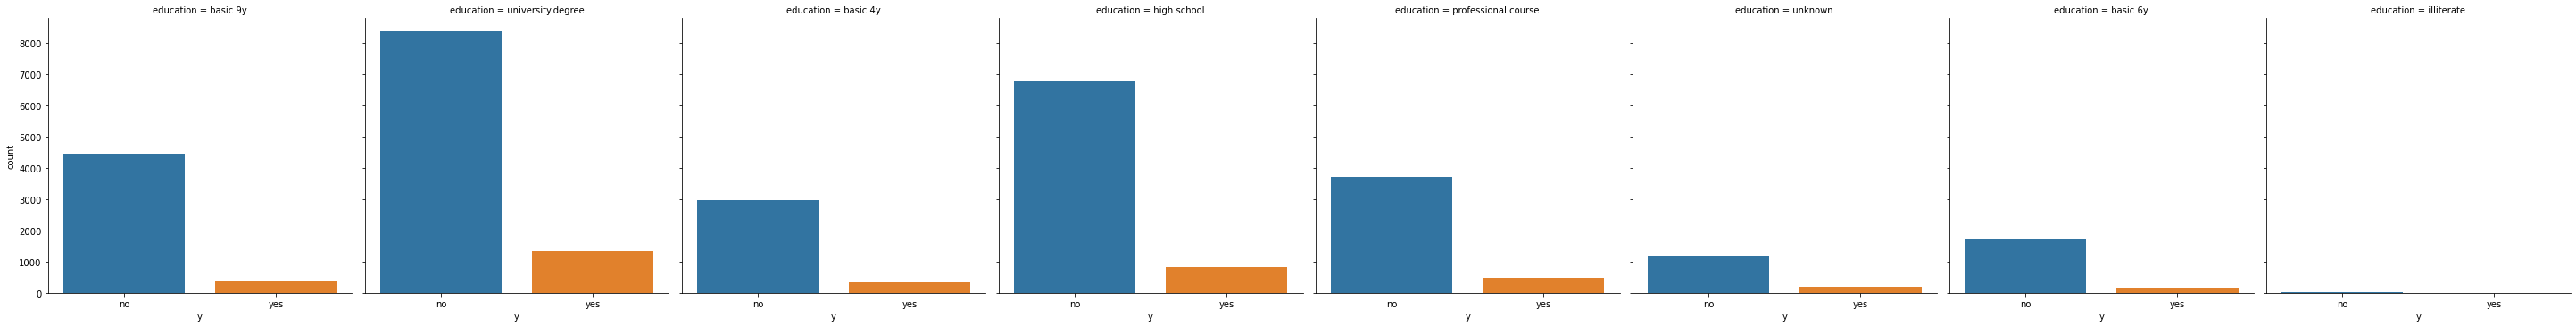

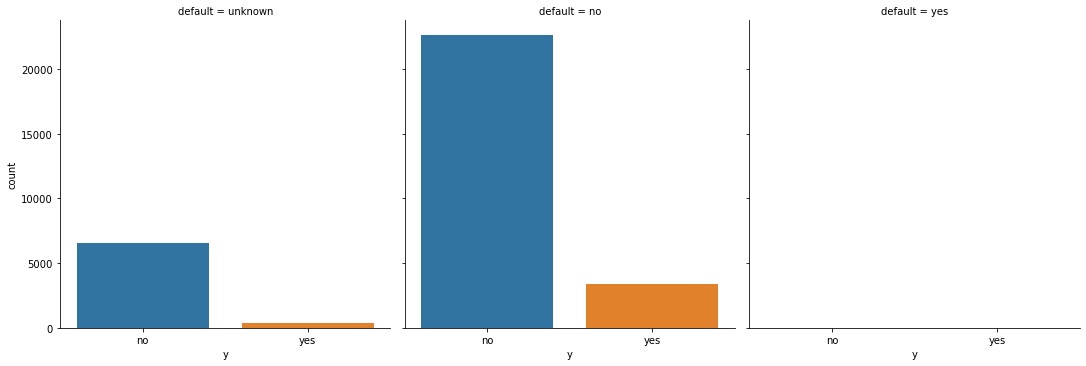

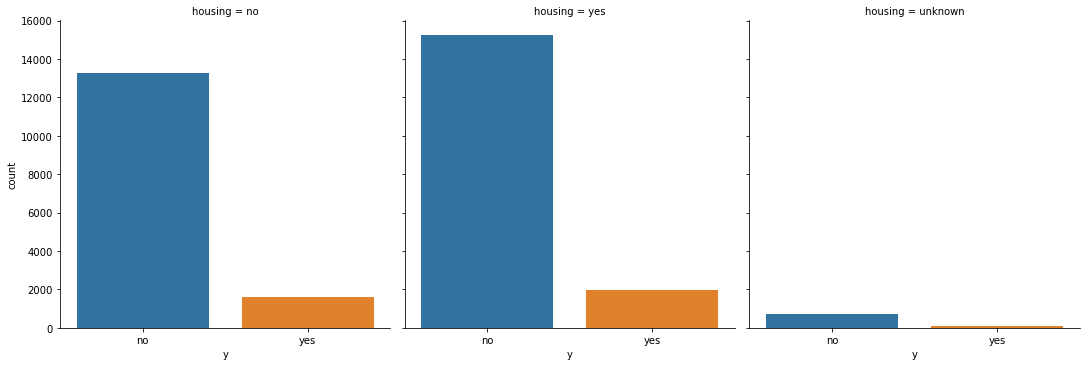

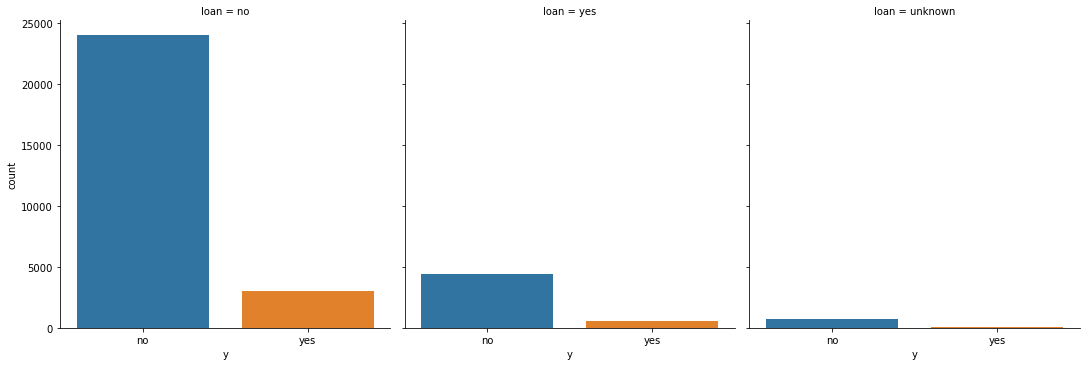

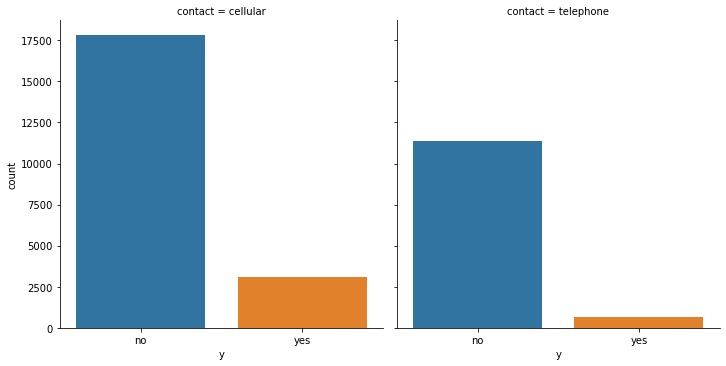

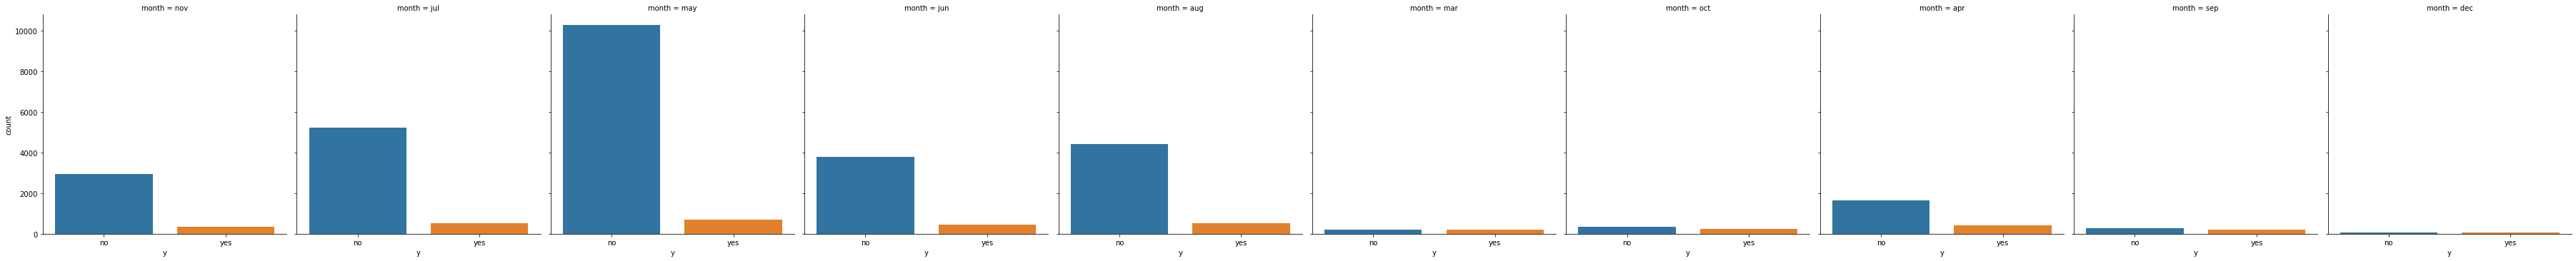

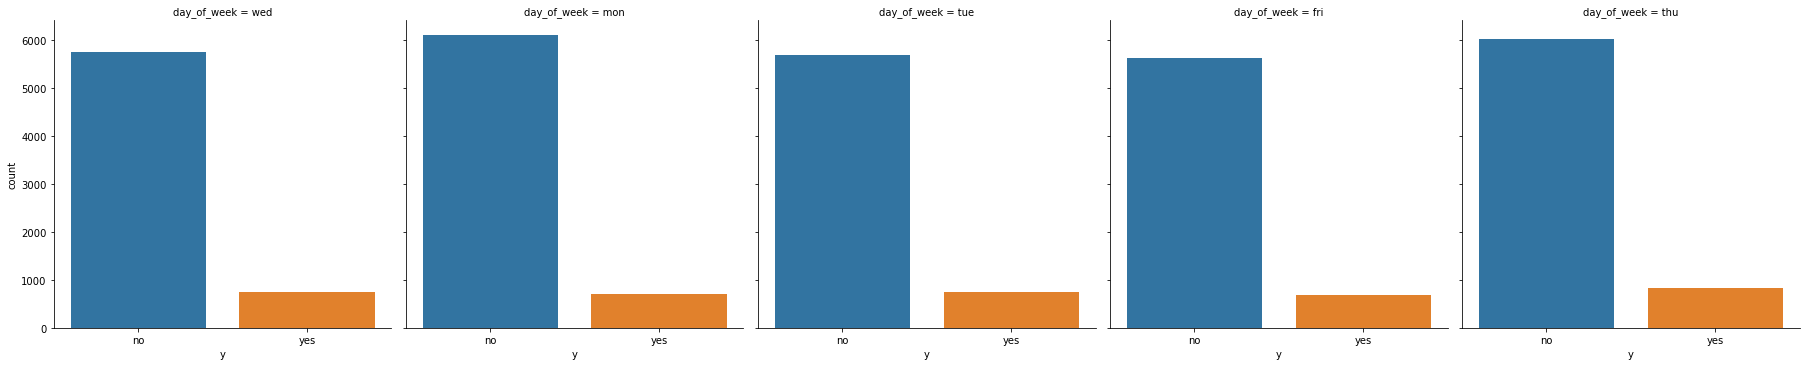

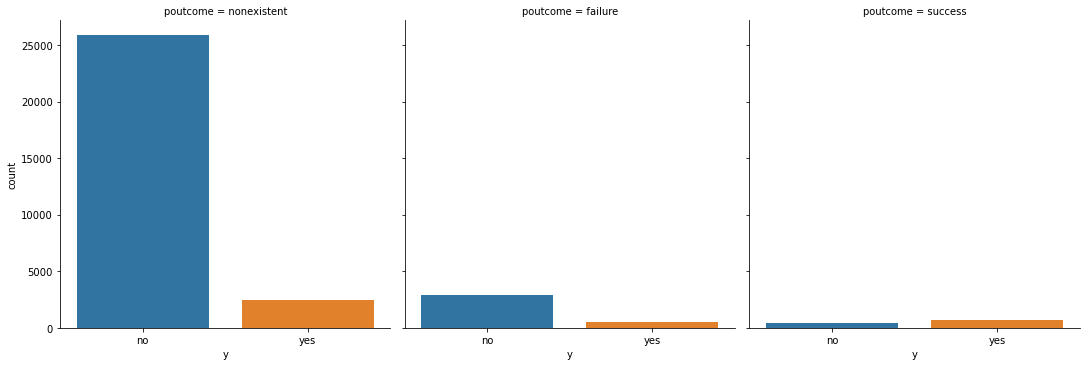

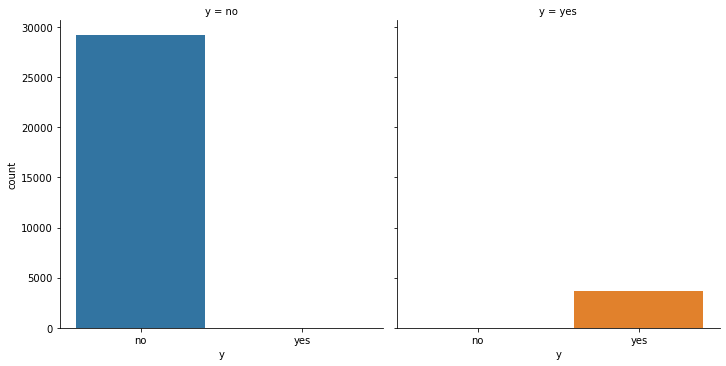

In [162]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_data:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [163]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_data:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           7235
     blue-collar      6916
     entrepreneur     1059
     housemaid         769
     management       2074
     retired          1017
     self-employed     979
     services         2938
     student           494
     technician       4809
     unemployed        682
     unknown           231
yes  admin.           1070
     blue-collar       514
     entrepreneur      100
     housemaid          86
     management        269
     retired           347
     self-employed     119
     services          254
     student           216
     technician        583
     unemployed        116
     unknown            33
dtype: int64
y    marital 
no   divorced     3300
     married     17910
     single       7939
     unknown        54
yes  divorced      371
     married      2019
     single       1306
     unknown        11
dtype: int64
y    education          
no   basic.4y               2978
     basic.6y               1707
     basic.9y     

# Explore the Numerical Features

In [167]:
#numerical data in dataset
numeric_data = df.select_dtypes(include = np.number)
numeric_data.head()

,age,duration,campaign,previous
0,49,227,4,0
1,37,202,2,1
2,78,1148,1,0
3,36,120,2,0
4,59,368,2,0


In [168]:
numeric_data.columns

Index(['age', 'duration', 'campaign', 'previous'], dtype='object')

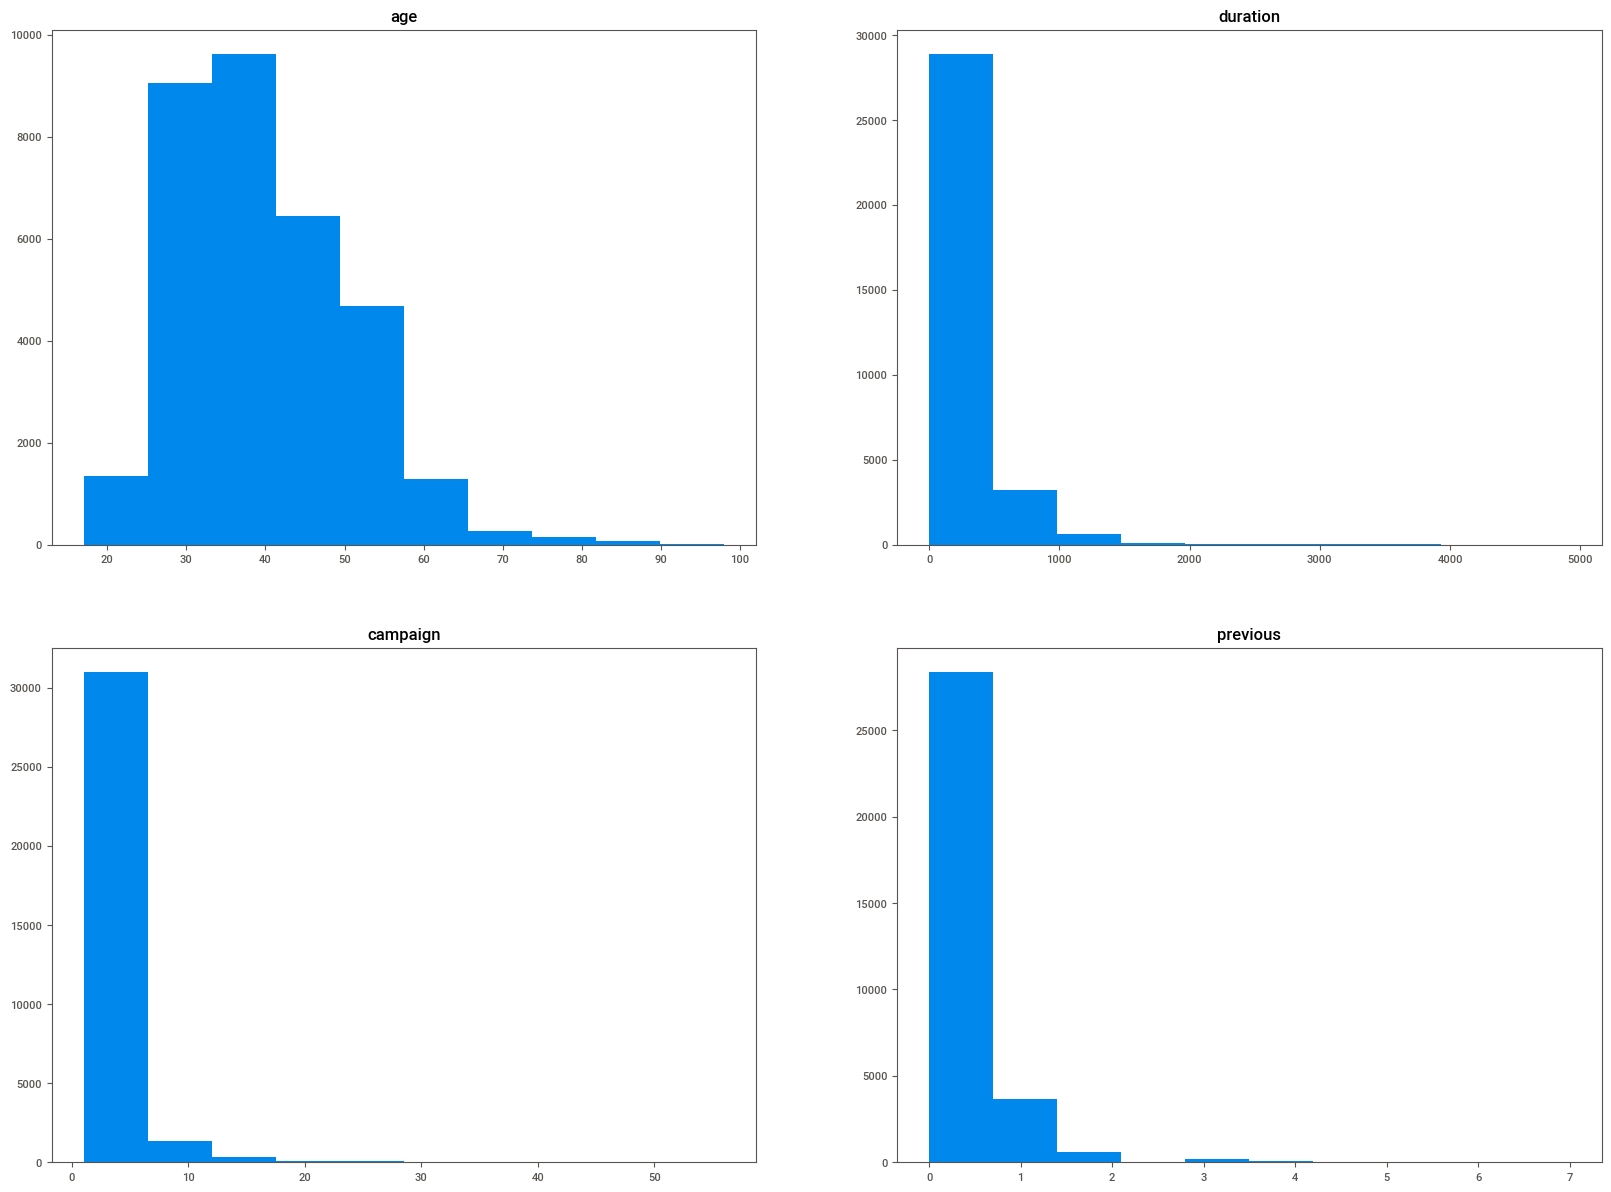

In [48]:
num_columns = ['age', 'duration', 'campaign', 'previous']

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 2
    trace_y = counter % 2
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Observations:
Most of the customers are in the age range of 30-40.

In Duration, most the values are very low and very few have high values.

The previous feature has maximum values lies within 0 - 0.8

# Distribution of Continous Numerical Features

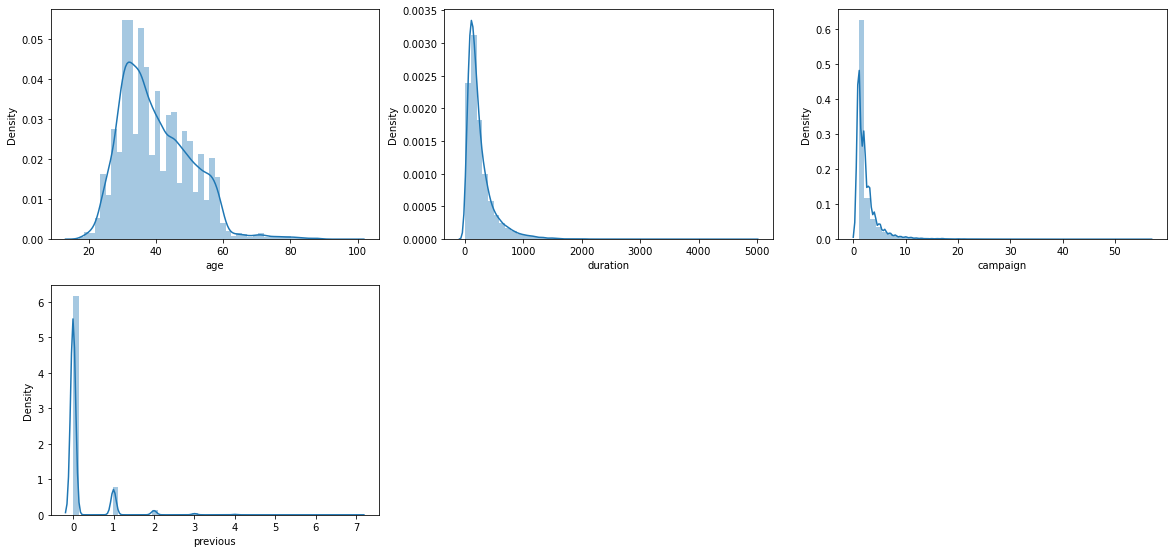

In [171]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numeric_feature in numeric_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[numeric_feature])
    plt.xlabel(numeric_feature)
    plotnumber+=1
plt.show()

Observations:

it seems age distributed normally

duration, compaign and previous heavely skewed towards left and seems to be have some outliers.

# Traget distribution

In [175]:
#Normalize the data to get ratio instead of raw count
df['y'].value_counts(normalize=True)

no     0.887359
yes    0.112641
Name: y, dtype: float64

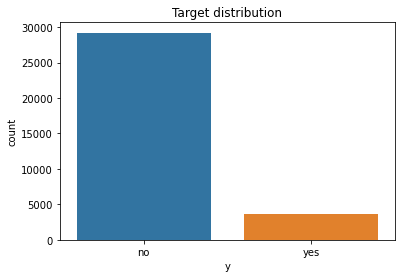

In [176]:
sns.countplot(df['y'])
plt.title('Target distribution')
plt.show()

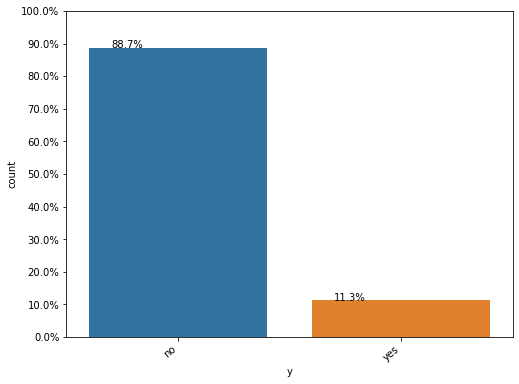

In [202]:
 plt.figure(figsize=(8,6))
Y = df["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
plt.show()

Approx 29000 have not subscribed to the bank term deposit which is 89% and only 11% have subscribed.

# Data Preprocessing

In [177]:
df.duplicated().sum() #finds duplicate rows

8

In [178]:
df[df.duplicated(keep='first')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,0,nonexistent,no
12252,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,0,nonexistent,no
24831,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,0,nonexistent,no
28456,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,0,nonexistent,no
29543,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,0,nonexistent,no
30807,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,0,nonexistent,no
32607,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,0,nonexistent,no


In [69]:
df.drop_duplicates(keep='first',inplace=True)

In [70]:
df.shape

(32902, 15)

In [181]:
print("Total duplicate Values in the data = ",df.duplicated().sum().sum())

Total duplicate Values in the data =  0


### Check the Rows with Null Values

First process: total number of null values in all valriables

Third process : finding %ge of null values in each variable

In [182]:
missing = df.isnull().sum()
missing

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64

In [183]:
# percentage of missing value

df.isnull().sum() / df.shape[0] * 100

age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
duration       0.0
campaign       0.0
previous       0.0
poutcome       0.0
y              0.0
dtype: float64

Observation:
Though the dataset has no missing values but it contains values such as  'unknown' which also needs to be treated

In [184]:
# There are many missing values in other forms like 'unknown'
missing_cols = df.isin(['unknown']).sum(axis=0)
missing_cols

age               0
job             264
marital          65
education      1394
default        6931
housing         795
loan            795
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
y                 0
dtype: int64

In [185]:
df[df.job == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
43,55,unknown,married,unknown,unknown,yes,no,cellular,aug,thu,60,4,0,nonexistent,no
102,45,unknown,married,unknown,unknown,yes,no,telephone,may,thu,56,2,0,nonexistent,no
361,26,unknown,single,high.school,unknown,no,no,telephone,jun,thu,237,5,0,nonexistent,no
451,58,unknown,married,basic.4y,no,yes,no,cellular,aug,tue,645,10,0,nonexistent,yes
533,48,unknown,married,basic.4y,unknown,no,no,telephone,may,tue,375,1,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32342,45,unknown,married,unknown,unknown,no,no,telephone,may,tue,315,1,0,nonexistent,no
32350,35,unknown,single,basic.4y,unknown,no,no,telephone,may,fri,121,4,0,nonexistent,no
32465,40,unknown,single,unknown,no,no,no,cellular,sep,thu,224,1,1,failure,yes
32594,55,unknown,married,basic.4y,no,yes,no,cellular,jul,thu,633,7,0,nonexistent,no


In [71]:
df.replace('unknown', np.NaN, inplace = True)

Replaced 'unknown' with the NaN values. Now we can detect and understand the weight of the NaN values on their own columns.

In [72]:
df.isnull().sum()

age               0
job             264
marital          65
education      1394
default        6931
housing         795
loan            795
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
y                 0
dtype: int64

In [10]:
#Identify missing value rate

marit_nan_rate = ((df['marital'].isnull().values.sum())/((df['marital'].isnull().values.sum()) 
                 + (df['marital'].notnull().values.sum())))*100
print("'marital' -  missing value rate  :",marit_nan_rate)


edu_nan_rate = ((df['education'].isnull().values.sum())/((df['education'].isnull().values.sum()) 
                 + (df['education'].notnull().values.sum())))*100
print("'education' -  missing value rate  :",edu_nan_rate)


job_nan_rate = ((df['job'].isnull().values.sum())/((df['job'].isnull().values.sum()) 
                 + (df['job'].notnull().values.sum())))*100
print("'job' -  missing value rate  :",job_nan_rate)

def_nan_rate = ((df['default'].isnull().values.sum())/((df['default'].isnull().values.sum()) 
                 + (df['default'].notnull().values.sum())))*100
print("'default' -  missing value rate  :",def_nan_rate)

hou_nan_rate = ((df['housing'].isnull().values.sum())/((df['housing'].isnull().values.sum()) 
                 + (df['housing'].notnull().values.sum())))*100
print("'housing' -  missing value rate  :",hou_nan_rate)

lon_nan_rate = ((df['loan'].isnull().values.sum())/((df['loan'].isnull().values.sum()) 
                 + (df['loan'].notnull().values.sum())))*100
print("'loan' -  missing value rate  :",lon_nan_rate)

'marital' -  missing value rate  : 0.19755637955139504
'education' -  missing value rate  : 4.23682450914838
'job' -  missing value rate  : 0.8023828338702814
'default' -  missing value rate  : 21.065588718011064
'housing' -  missing value rate  : 2.41626648835937
'loan' -  missing value rate  : 2.41626648835937


The result says that we do not need to drop the whole column as the missing value %ge is not more than 70-80%
Only the 'default' column has 21 %, others have very small rates to do something.

In [73]:
#replaced the NaN values with the mode of the variables.
df.job.fillna(df.job.mode()[0], inplace = True)
df.education.fillna(df.education.mode()[0], inplace = True)
df.marital.fillna(df.marital.mode()[0], inplace =True)
df.default.fillna(df.default.mode()[0], inplace =True)
df.housing.fillna(df.housing.mode()[0], inplace =True)
df.loan.fillna(df.loan.mode()[0], inplace =True)

In [190]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64

# Bivariate analysis of Categorical features

In [191]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'y'],
      dtype='object')

# Marital

<AxesSubplot:ylabel='marital'>

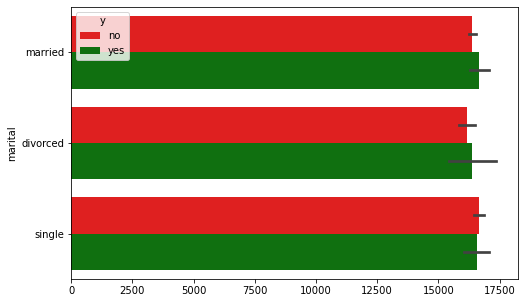

In [192]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.marital.index, y = df.marital, data = df, palette = palette, hue = 'y')

Acording to plot for marital status doesn't show us clearly if there is a certain situation.

## Job

<AxesSubplot:ylabel='job'>

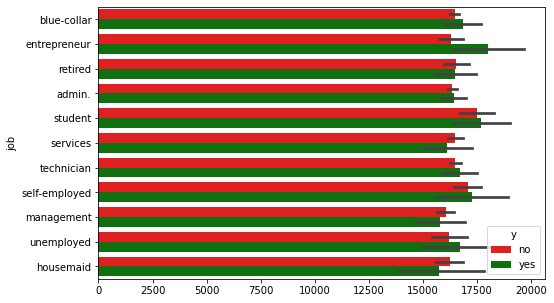

In [52]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.job.index, y = df.job, data = df, palette = palette, hue = 'y')

Solution:
    
our focus group might be Housemaids, students, entrepreneurs, self-employed people.
    
Seemingly, especially the student group has the higher tendency to buying term-deposit.

## Education

<AxesSubplot:ylabel='education'>

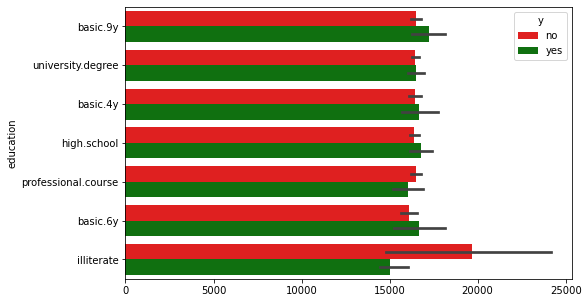

In [53]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.education.index, y = df.education, data = df, palette = palette, hue = 'y')

Solution:
    
Education plot shows us that, when the educational level is getting higher, also tendency of making saving is also getting higher.
Also we can say from this conclusion that, students are also our potential customers. We can start a campaign also for them.
Maybe special offers for the university students, might be more effective.

## Default

<AxesSubplot:ylabel='default'>

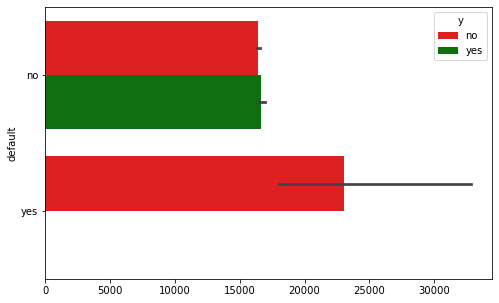

In [193]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.default.index, y = df.default, data = df, palette = palette, hue = 'y')

# Housing

<AxesSubplot:ylabel='housing'>

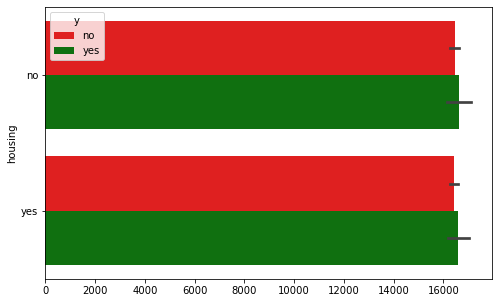

In [59]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.housing.index, y = df.housing, data = df, palette = palette, hue = 'y')

# Loan

<AxesSubplot:ylabel='loan'>

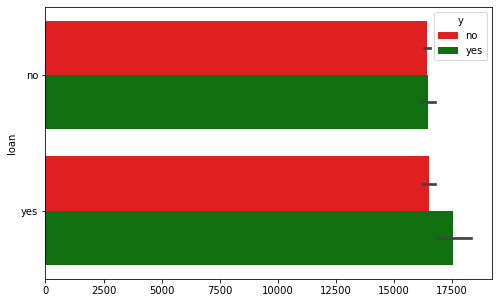

In [60]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.loan.index, y = df.loan, data = df, palette = palette, hue = 'y')

# Contact

<AxesSubplot:ylabel='contact'>

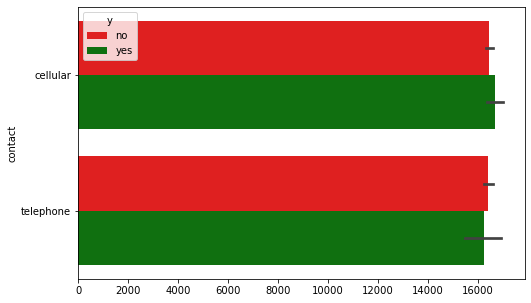

In [61]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.contact.index, y = df.contact, data = df, palette = palette, hue = 'y')

# Month

<AxesSubplot:ylabel='month'>

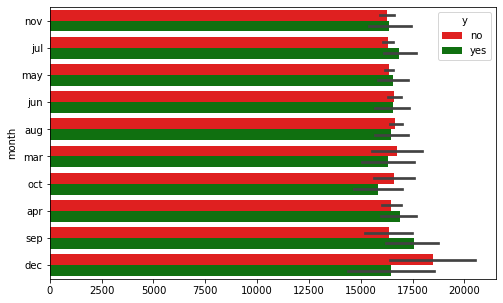

In [62]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.month.index, y = df.month, data = df, palette = palette, hue = 'y')

# Days of Week

<AxesSubplot:ylabel='day_of_week'>

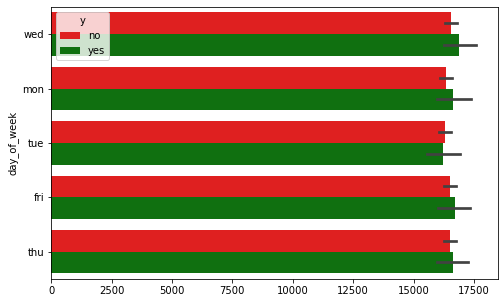

In [63]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.day_of_week.index, y = df.day_of_week, data = df, palette = palette, hue = 'y')

# Duration

In [74]:
le = LabelEncoder()
df_target = pd.DataFrame(df.loc[:,'y'].values)
df_target.columns = ['y']
df_target.y = le.fit_transform(df_target.y)
df_target.head()

,y
0,0
1,0
2,1
3,0
4,0


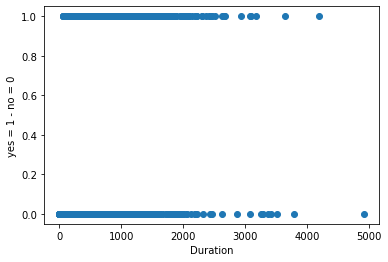

Max- duration for phone call:  4918
Min- duration for phone call:  0
Mean- duration for phone call:  258.1965230077199
Mode- duration for phone call:  90


In [75]:
palette = ['red','green']
plt.scatter(x = df.duration, y = df_target);
plt.xlabel('Duration')
plt.ylabel('yes = 1 - no = 0')
plt.show()
print('Max- duration for phone call: ', df.duration.max())
print('Min- duration for phone call: ', df.duration.min())
print('Mean- duration for phone call: ', df.duration.mean())
print('Mode- duration for phone call: ', df.duration.mode()[0])

Duration is the important featue as it is the time duration when we make a phone call.
As per the plot, it is really important that the customers do not prefer the long call durations.
This can make people annoying and the company might loose potential customers because of the redial frequency and its duration.

# poutcome

<AxesSubplot:ylabel='poutcome'>

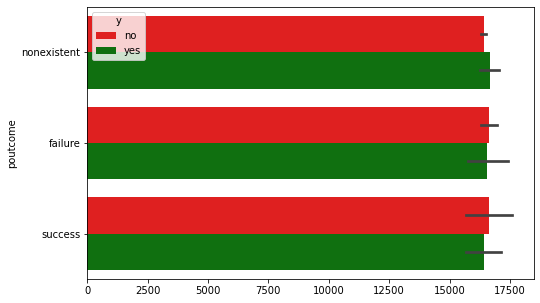

In [64]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.poutcome.index, y = df.poutcome, data = df, palette = palette, hue = 'y')

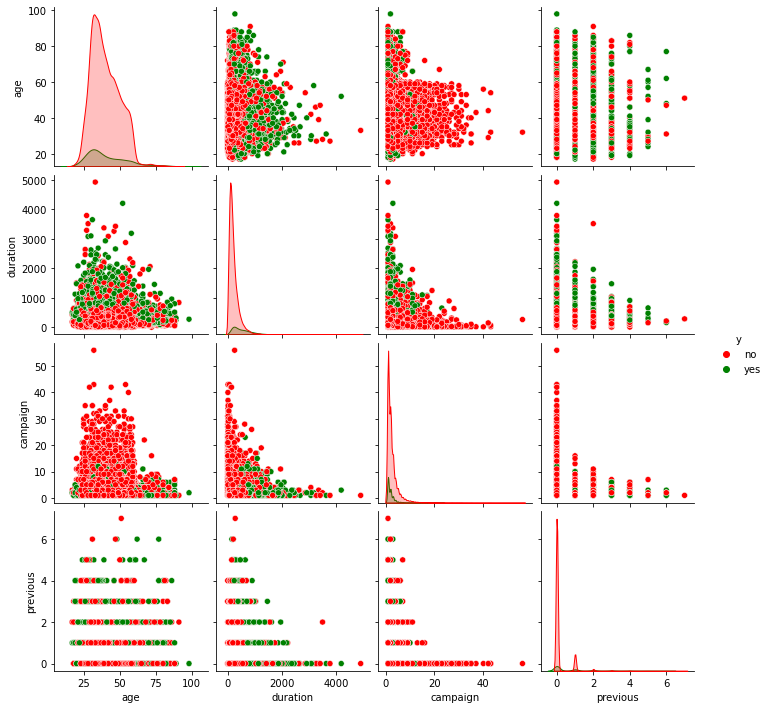

In [49]:
palette = ['red','green']
sns.pairplot(df, hue = 'y',palette = palette);

In [ ]:
Check relationship of numerical variable with the target variable.

In [ ]:
Numerical Bivariant

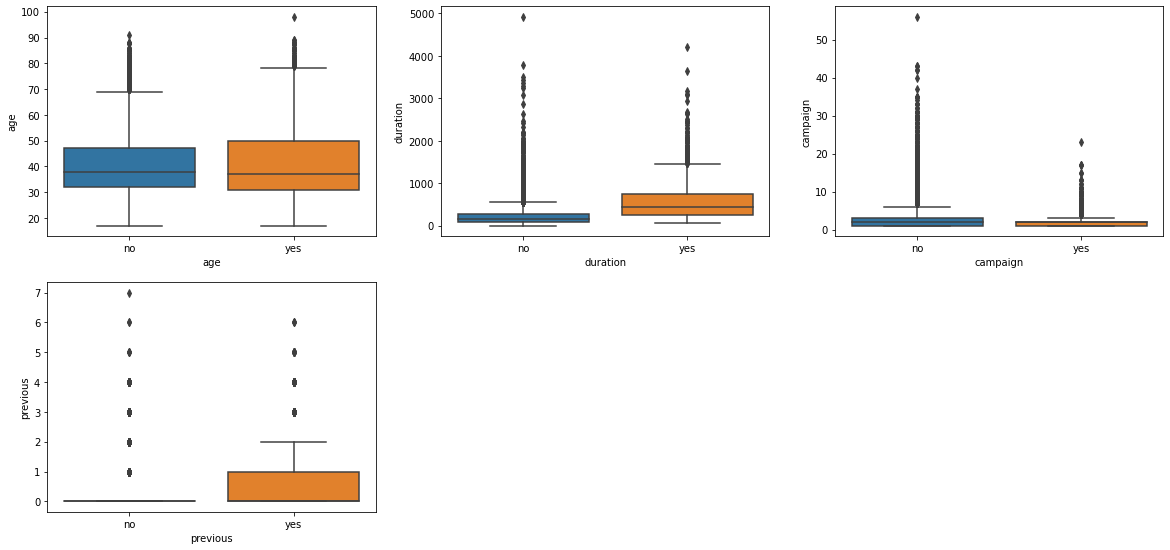

In [195]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numeric_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

In [199]:
count_month_response_pct = pd.crosstab(df['y'],df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [200]:
month = pd.DataFrame(df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('month',ascending = True)

TypeError: can only concatenate str (not "float") to str

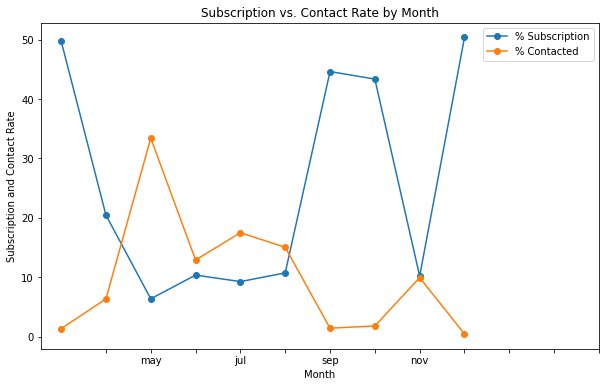

In [201]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

# Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

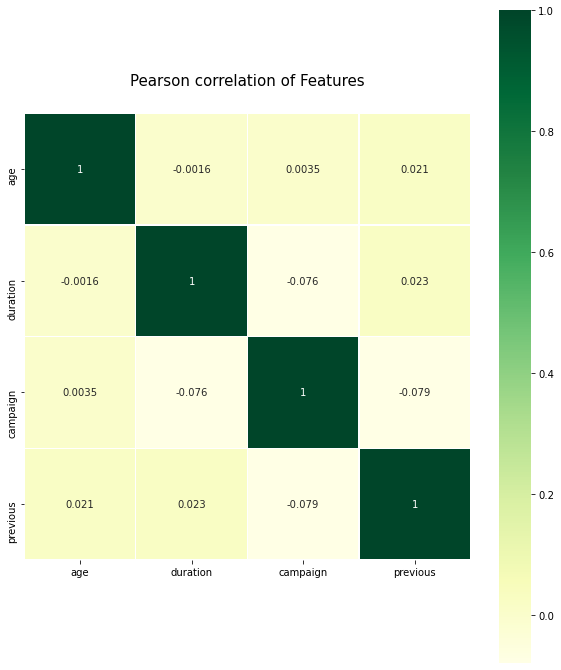

In [203]:
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are no numerical features which share a high correlation between them

In [207]:
#defaut features does not play imp role
df.groupby(['y','default']).size()

y    default
no   no         29192
     yes            3
yes  no          3707
dtype: int64

In [1]:
#df.drop(['default'],axis=1, inplace=True)

# Outlier Detection & Treatment

age            AxesSubplot(0.125,0.816017;0.133621x0.0639831)
duration    AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
campaign     AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
previous    AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
dtype: object

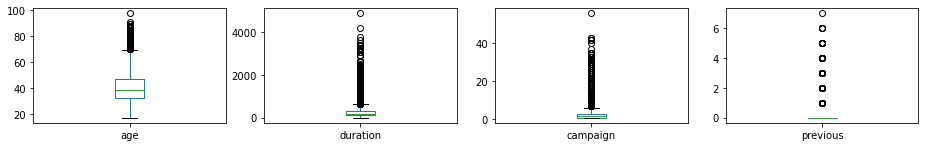

In [205]:
df.select_dtypes(include=['integer']).plot(kind="box",subplots=True,layout = (10,5),figsize=(20,25))

We can see that numerical columns have outliers.

In [208]:
df.groupby('y').mean()

,age,duration,campaign,previous
y,,,,
no,39.905635,221.187977,2.625039,0.133961
yes,40.856757,549.662530,2.055031,0.496898


We can see that duration, previous have outliers

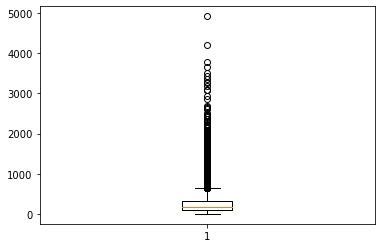

In [14]:
plt.boxplot(df['duration'])
plt.show()

Removing Outliers from duration column

In [13]:
print(df['duration'].quantile(0.10))
print(df['duration'].quantile(0.90))

59.0
550.0


In [76]:
df['duration'] = np.where(df['duration'] >550.0, 550.0,df['duration'])

In [77]:
df['duration'].describe()

count    32902.000000
mean       227.032673
std        159.793619
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        550.000000
Name: duration, dtype: float64

In [15]:
# checking outliers in feature age...
df.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 17 to 95 which is normal

age
17     3
18    22
19    37
20    52
21    79
      ..
87     1
88    17
89     2
91     1
98     1
Name: age, Length: 75, dtype: int64

Removing outliers in campaign using IQR technique

In [16]:
# remove outliers in feature campaign
Q1 = np.percentile(df['campaign'], 25)
Q3 = np.percentile(df['campaign'], 75)
IQR = Q3 - Q1

Lower_tail = Q1 - 1.5 * IQR
Upper_tail = Q3 + 1.5 * IQR

df[df['campaign']>Upper_tail]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
18,50,services,single,basic.4y,no,yes,no,telephone,may,tue,98.0,9,0,nonexistent,no
30,34,technician,single,high.school,no,no,no,telephone,jun,fri,236.0,7,0,nonexistent,no
74,39,entrepreneur,married,high.school,no,no,yes,telephone,may,wed,173.0,7,0,nonexistent,no
78,49,admin.,married,high.school,no,no,no,cellular,aug,tue,15.0,13,0,nonexistent,no
97,48,services,married,basic.9y,no,no,no,cellular,may,fri,18.0,8,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32850,56,services,married,high.school,no,yes,no,telephone,jun,wed,75.0,14,0,nonexistent,no
32852,37,admin.,single,university.degree,no,no,no,telephone,jun,fri,18.0,11,0,nonexistent,no
32866,49,services,divorced,high.school,no,yes,no,cellular,jul,tue,100.0,9,0,nonexistent,no
32886,51,admin.,married,basic.9y,no,yes,no,telephone,jun,fri,114.0,7,0,nonexistent,no


In [17]:
df[df['campaign']<Lower_tail]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y


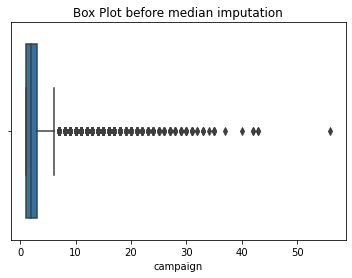

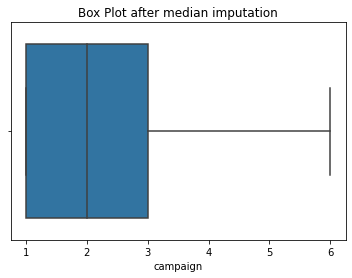

In [78]:
sns.boxplot(df['campaign'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['campaign'])
for i in df['campaign']:
    if i > Upper_tail or i < Lower_tail:
            df['campaign'] = df['campaign'].replace(i, med)
sns.boxplot(df['campaign'])
plt.title("Box Plot after median imputation")
plt.show()

In [218]:
# remove outliers in feature previous...
df.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           25875
     1            2886
     2             324
     3              74
     4              29
     5               4
     6               2
     7               1
yes  0            2497
     1             783
     2             282
     3             101
     4              31
     5              10
     6               3
Name: previous, dtype: int64

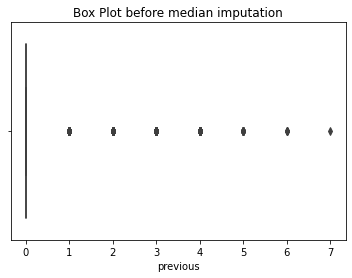

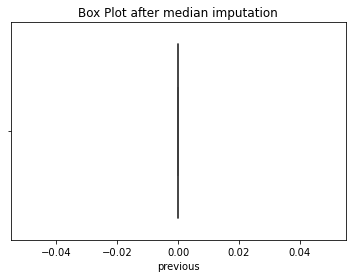

In [236]:
sns.boxplot(df['previous'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['previous'].quantile(0.25)
q3 = df['previous'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['previous'])
for i in df['previous']:
    if i > Upper_tail or i < Lower_tail:
            df['previous'] = df['previous'].replace(i, med)
sns.boxplot(df['previous'])
plt.title("Box Plot after median imputation")
plt.show()

# CONVERT CATEGORICAL TO NUMERICAL

In [219]:
df.dtypes

age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
month           object
day_of_week     object
duration       float64
campaign         int64
previous         int64
poutcome        object
y               object
dtype: object

In [222]:
print("Unique levels in 'job' variable:", df.job.nunique())
print("Unique levels in 'marital' variable:", df.marital.nunique())
print("Unique levels in 'education' variable:", df.education.nunique())
print("Unique levels in 'default' variable:", df.default.nunique())
print("Unique levels in 'housing' variable:", df.housing.nunique())
print("Unique levels in 'loan' variable:", df.loan.nunique())
print("Unique levels in 'contact' variable:", df.contact.nunique())
print("Unique levels in 'poutcome' variable:", df.poutcome.nunique())
print("Unique levels in 'day_of_week' variable:", df.day_of_week.nunique())
print("Unique levels in 'y' variable:", df.y.nunique())

Unique levels in 'job' variable: 11
Unique levels in 'marital' variable: 3
Unique levels in 'education' variable: 7
Unique levels in 'default' variable: 2
Unique levels in 'housing' variable: 2
Unique levels in 'loan' variable: 2
Unique levels in 'contact' variable: 2
Unique levels in 'poutcome' variable: 3
Unique levels in 'day_of_week' variable: 5
Unique levels in 'y' variable: 2


From the information above, we will create one-hot encoding for categorical variables with > 2 levels. So, 'job','month', 'marital', 'education', 'default', 'housing','loan','contact', 'month' and 'poutcome' variables have levels >2.
For 'contact', 'y' variables, we use create label encoding as they have just 2 unique levels.

In [79]:
cat_columns = ['job', 'month','marital', 'education',  'poutcome', 'day_of_week']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [80]:
bool_columns = ['default','housing', 'loan', 'contact','y']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [81]:
df.tail()

,age,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_new,housing_new,loan_new,contact_new,y_new
32905,30,197.0,5,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
32906,34,550.0,3,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
32907,33,61.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
32908,58,266.0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32909,39,64.0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [82]:
df.dtypes

age                                int64
duration                         float64
campaign                           int64
previous                           int64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
month_aug                          uint8
month_dec                          uint8
month_jul                          uint8
month_jun                          uint8
month_mar                          uint8
month_may                          uint8
month_nov                          uint8
month_oct                          uint8
month_sep                          uint8
marital_married                    uint8
marital_single  

# Treating Imbalanced Data

Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.

In [83]:
df.y_new.value_counts()

0    29195
1     3707
Name: y_new, dtype: int64

This imbalance has to treated so as to make sure that there is no bias in modeling. Imbalance is generally treated in three ways.

Split Dataset into Training set and Test set

In [84]:
X = df.drop(['y_new'],axis=1)
y = df['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
sm = SMOTE(random_state = 2)

In [87]:
X_sm, y_sm = sm.fit_resample(X, y)

In [88]:
pd.Series(y_sm).value_counts()

1    29195
0    29195
Name: y_new, dtype: int64

# Data Split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=42)

## Feature Scaling

As the data is not normalised so we are using minmaxscaler

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2= pd.DataFrame(scaler.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [92]:
print("Checking the y train data set\n",y_train.value_counts())

Checking the y train data set
 0    23406
1    23306
Name: y_new, dtype: int64


Applying Grid Search & cross validation on models

# KNN

In [106]:
cls_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
cls_KN.fit(X_train, y_train)

ykn_hat = cls_KN.predict(X_test)

con_mat = confusion_matrix(y_test,ykn_hat)
print(con_mat)
print(classification_report(y_test,ykn_hat))

[[5197  592]
 [ 420 5469]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5789
           1       0.90      0.93      0.92      5889

    accuracy                           0.91     11678
   macro avg       0.91      0.91      0.91     11678
weighted avg       0.91      0.91      0.91     11678



# Logistic Regression - Grid search with Cross validation¶

In [94]:
lreg=LogisticRegression(random_state = 0)
penalty = ['l1', 'l2']

In [95]:
# Create regularization hyperparameter space
C = [0.001,0.01,0.1,0.2,0.8,1.2,1.5]
hyperparameters = dict(C=C, penalty=penalty)

In [96]:
# Create grid search using 5-fold cross validation
GS_lreg = GridSearchCV(lreg, hyperparameters, cv=5, verbose=0)
# Fit grid search
LR_best_model = GS_lreg.fit(X_train, y_train)
y_pred = GS_lreg.predict(X_test)

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [100]:
print("accuracy_score: " + str(accuracy_score(y_test, y_pred)))
print("\n")
print("classification_report:\n",classification_report(y_test,y_pred))
print("\n")
print("confusion_matrix:\n ",confusion_matrix(y_test,y_pred))

accuracy_score: 0.9214762801849632


classification_report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      5789
           1       0.92      0.92      0.92      5889

    accuracy                           0.92     11678
   macro avg       0.92      0.92      0.92     11678
weighted avg       0.92      0.92      0.92     11678



confusion_matrix:
  [[5348  441]
 [ 476 5413]]


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

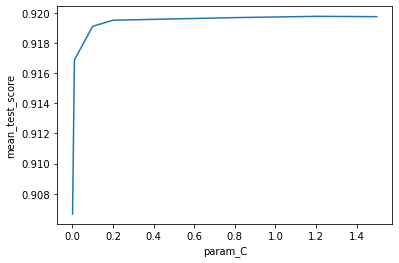

In [102]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(GS_lreg.cv_results_))

# Random Forest Classifier

In [107]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.94091833 0.94059724 0.9394134  0.94005566 0.94647827]
0.9414925815548457


In [108]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[13:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [109]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [111]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

[13:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

KeyboardInterrupt: 

RFC
c-m [[5461  328]
 [ 378 5511]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5789
           1       0.94      0.94      0.94      5889

    accuracy                           0.94     11678
   macro avg       0.94      0.94      0.94     11678
weighted avg       0.94      0.94      0.94     11678



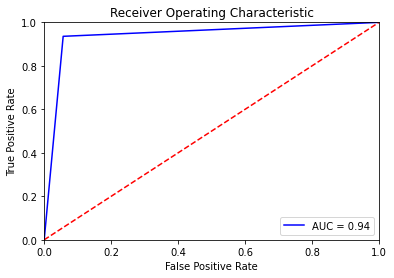

In [114]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

yrfc_hat= rfc.predict(X_test)
cm = confusion_matrix(y_test,yrfc_hat)
print('RFC')
print('c-m',cm)
print(classification_report(y_test,yrfc_hat))



fpr, tpr, threshold = metrics.roc_curve(y_test, yrfc_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

# Feature Selection

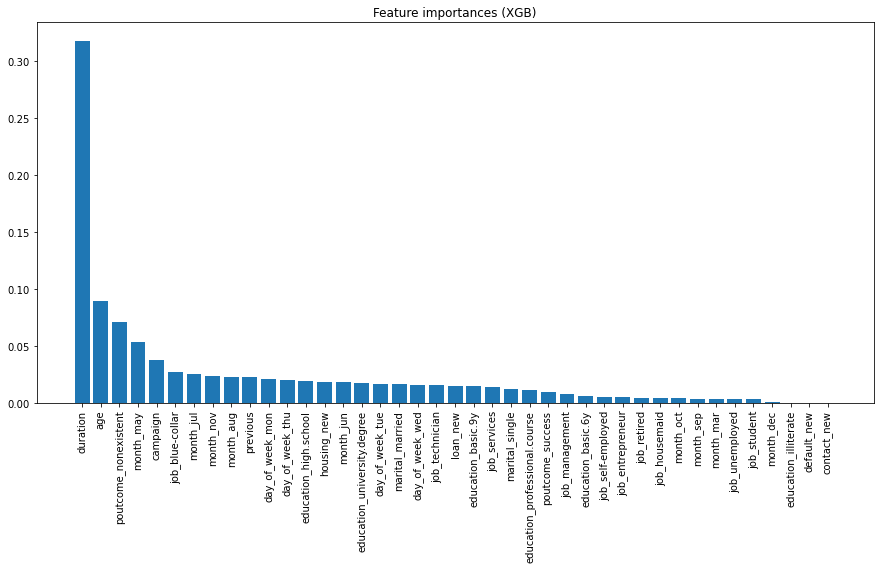

In [118]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rfc.feature_importances_), key=lambda x: x[1] * -1)
rfc_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(rfc_feature_importances))
plt.bar(x_pos, rfc_feature_importances['score'])
plt.xticks(x_pos, rfc_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

# Model Evaluation

In [124]:
print("accuracy_score: " + str(accuracy_score(y_test, yrfc_hat)))
print("\n")
print("classification_report:\n",classification_report(y_test,yrfc_hat))
print("\n")
print("confusion_matrix:\n ",confusion_matrix(y_test,yrfc_hat))

accuracy_score: 0.9395444425415311


classification_report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5789
           1       0.94      0.94      0.94      5889

    accuracy                           0.94     11678
   macro avg       0.94      0.94      0.94     11678
weighted avg       0.94      0.94      0.94     11678



confusion_matrix:
  [[5461  328]
 [ 378 5511]]


<AxesSubplot:>

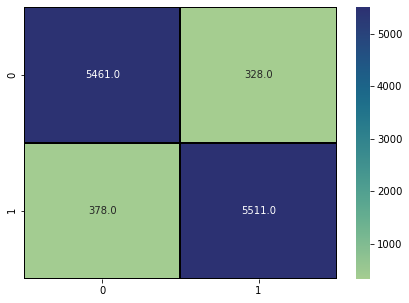

In [127]:
cf_matrix = confusion_matrix(y_test,yrfc_hat)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix, annot=True, linewidths = 1.0, cmap = 'crest', linecolor = 'black',fmt=".1f")

In [128]:
#SPECIFICITY / SENSITIVITY
#Confusion matrix, Accuracy, sensitivity and specificity

print('Confusion Matrix : \n', cf_matrix)

total1=sum(sum(cf_matrix))
#####from confusion matrix calculate accuracy
accuracy_lr=(cf_matrix[0,0]+cf_matrix[1,1])/total1
print ('Accuracy : ', accuracy_lr)

sens_lr = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sens_lr)

spec_lr = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', spec_lr)

Confusion Matrix : 
 [[5461  328]
 [ 378 5511]]
Accuracy :  0.9395444425415311
Sensitivity :  0.943340818794265
Specificity :  0.9358125318390219


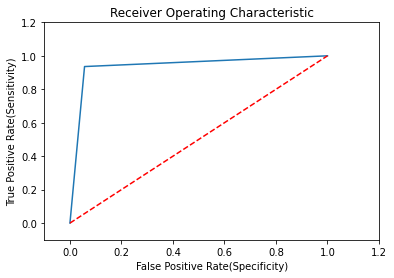

In [129]:
#ROC
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,yrfc_hat)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()


# Prepare data for Test

In [40]:
df_test=data_test.copy()

In [41]:
print(f"The Dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The Dataset has 40 rows and 14 columns


In [42]:
#check duplicate
df_test.duplicated().sum()

0

In [43]:
#check missing values
missing = df_test.isnull().sum()
missing

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
dtype: int64

In [44]:
missing_cols = df_test.isin(['unknown']).sum(axis=0)
missing_cols

age            0
job            1
marital        0
education      2
default        8
housing        1
loan           1
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
dtype: int64

In [45]:
df_test.replace('unknown', np.NaN, inplace = True)

In [46]:
df_test.isnull().sum()

age            0
job            1
marital        0
education      2
default        8
housing        1
loan           1
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
dtype: int64

In [48]:
#replaced the NaN values with the mode of the variables.
df_test.job.fillna(df_test.job.mode()[0], inplace = True)
df_test.education.fillna(df_test.education.mode()[0], inplace = True)
df_test.default.fillna(df_test.default.mode()[0], inplace =True)
df_test.housing.fillna(df_test.housing.mode()[0], inplace =True)
df_test.loan.fillna(df_test.loan.mode()[0], inplace =True)

In [49]:
df_test.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
dtype: int64

In [52]:
df_test.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
previous        int64
poutcome       object
dtype: object

age            AxesSubplot(0.125,0.816017;0.133621x0.0639831)
duration    AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
campaign     AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
previous    AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
dtype: object

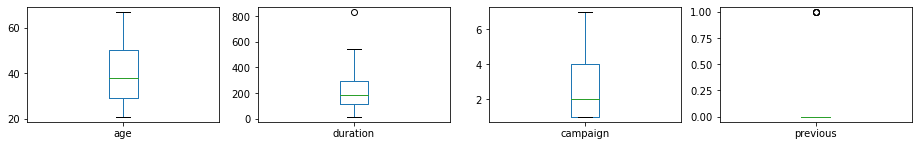

In [53]:
#identify outliers
df_test.select_dtypes(include=['integer']).plot(kind="box",subplots=True,layout = (10,5),figsize=(20,25))

In [56]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome
0,34,services,married,high.school,no,no,no,telephone,may,thu,214,4,0,nonexistent
1,29,blue-collar,single,basic.9y,no,no,no,cellular,jul,thu,190,1,0,nonexistent
2,35,admin.,single,high.school,no,no,no,cellular,may,wed,152,2,0,nonexistent
3,60,admin.,divorced,high.school,no,yes,no,cellular,jul,fri,179,1,0,nonexistent
4,45,management,married,university.degree,no,no,no,telephone,may,wed,105,2,0,nonexistent


In [57]:
cat_columns = ['job', 'month','marital', 'education',  'poutcome', 'day_of_week']
for col in  cat_columns:
    df_test = pd.concat([df_test.drop(col, axis=1),pd.get_dummies(df_test[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)


In [58]:
bool_columns = ['default','housing', 'loan', 'contact']
for col in  bool_columns:
    df_test[col+'_new']=df_test[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_test.drop(col, axis=1, inplace=True)


In [59]:
df_test.head()

,age,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,...,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_new,housing_new,loan_new,contact_new
0,34,214,4,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1,29,190,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,35,152,2,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,60,179,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,45,105,2,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [61]:
df_test.dtypes

age                              int64
duration                         int64
campaign                         int64
previous                         int64
job_blue-collar                  uint8
job_entrepreneur                 uint8
job_management                   uint8
job_retired                      uint8
job_self-employed                uint8
job_services                     uint8
job_student                      uint8
job_technician                   uint8
month_aug                        uint8
month_jul                        uint8
month_jun                        uint8
month_may                        uint8
month_nov                        uint8
marital_married                  uint8
marital_single                   uint8
education_basic.9y               uint8
education_high.school            uint8
education_professional.course    uint8
education_university.degree      uint8
poutcome_nonexistent             uint8
poutcome_success                 uint8
day_of_week_mon          

In [161]:
df_test.head()

,age,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,...,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_new,housing_new,loan_new,contact_new,df_test
0,34,214,4,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,29,190,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,152,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,60,179,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,45,105,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [148]:
df.columns

Index(['age', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'poutcome_nonexistent', 'poutcome_success', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_new',
       'housing_new', 'loan_new', 'contact_new', 'y_new', 'df'],
      dtype='object')

In [149]:
df_test.columns

Index(['age', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'month_aug', 'month_jul', 'month_jun', 'month_may', 'month_nov',
       'marital_married', 'marital_single', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'poutcome_nonexistent',
       'poutcome_success', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'default_new', 'housing_new',
       'loan_new', 'contact_new', 'df_test'],
      dtype='object')

In [165]:
X1.columns.difference(df_test.columns)

Index([], dtype='object')

In [162]:
X1 = df.drop(['df', 'education_basic.6y', 'education_illiterate', 'job_housemaid',
       'job_unemployed', 'month_dec', 'month_mar', 'month_oct', 'month_sep',
       'y_new'],axis=1)

In [169]:
X1.columns

Index(['age', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'month_aug', 'month_jul', 'month_jun', 'month_may', 'month_nov',
       'marital_married', 'marital_single', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'poutcome_nonexistent',
       'poutcome_success', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'default_new', 'housing_new',
       'loan_new', 'contact_new'],
      dtype='object')

In [172]:
df_test1 = df_test.drop('df_test',axis=1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state=42)

In [173]:
scaler = MinMaxScaler()
X_train3 = pd.DataFrame(scaler.fit_transform(X1))
df_test2= pd.DataFrame(scaler.transform(df_test1))
X_train3.columns = X1.columns.values
df_test2.columns = df_test1.columns.values
X_train3.index = X1.index.values
df_test2.index = df_test1.index.values
X_train = X_train3
df_test1 = df_test2

In [175]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [178]:
yrfc_hat1= rfc.predict(df_test1)

In [190]:
y_prob = rfc.predict_proba(df_test1)

In [191]:
# Lets add the columns back to the dataframe
df_test1['predictions'] = yrfc_hat1
df_test1['probabilities'] = y_prob[:,1]

In [193]:
df_test1.to_excel("test_file.xlsx")

# Feature Selection

# 1) Correlation Matrix

<AxesSubplot:>

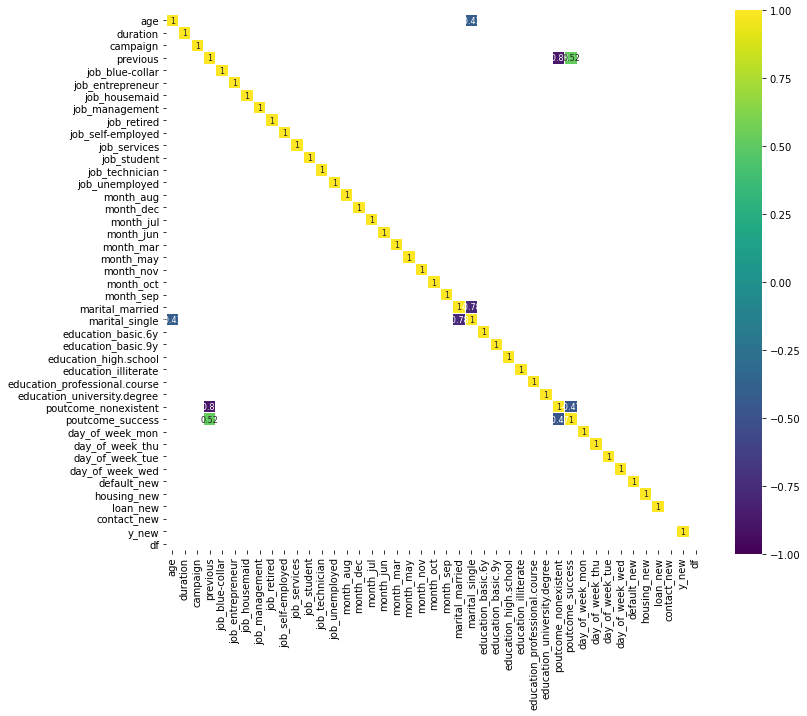

In [194]:
corr = df.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)


# 2) VIF Score

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                          feature         VIF
0                             age    1.614967
1                        duration    1.201340
2                        campaign    1.021071
3                        previous    4.734441
4                 job_blue-collar    2.262799
5                job_entrepreneur    1.130039
6                   job_housemaid    1.169923
7                  job_management    1.238664
8                     job_retired    1.452731
9               job_self-employed    1.112577
10                   job_services    1.396052
11                    job_student    1.145301
12                 job_technician    1.731863
13                 job_unemployed    1.094452
14                      month_aug    3.038603
15                      month_dec    1.077497
16                      month_jul    3.268445
17                      month_jun    2.756299
18                      month_mar    1.220545
19                      month_may    4.350865
20                      month_nov 

## 3) Tree Based Technique 

Feature ranking:
1. feature 1 (0.273220)
2. feature 0 (0.142500)
3. feature 4 (0.106683)
4. feature 2 (0.054338)
5. feature 41 (0.049491)
6. feature 3 (0.025175)
7. feature 28 (0.016721)
8. feature 36 (0.016599)
9. feature 29 (0.016310)
10. feature 35 (0.015558)
11. feature 37 (0.015443)
12. feature 38 (0.015356)
13. feature 34 (0.014696)
14. feature 40 (0.013928)
15. feature 5 (0.013758)
16. feature 39 (0.013501)
17. feature 25 (0.013452)
18. feature 22 (0.012529)
19. feature 17 (0.012393)
20. feature 30 (0.011064)
21. feature 18 (0.010808)
22. feature 31 (0.010776)
23. feature 14 (0.010618)
24. feature 24 (0.009650)
25. feature 6 (0.009470)
26. feature 33 (0.009208)
27. feature 32 (0.009156)
28. feature 21 (0.008865)
29. feature 16 (0.008257)
30. feature 9 (0.007945)
31. feature 12 (0.007715)
32. feature 19 (0.007410)
33. feature 13 (0.006265)
34. feature 10 (0.006233)
35. feature 11 (0.005540)
36. feature 20 (0.005388)
37. feature 7 (0.004915)
38. feature 15 (0.004896)
39. feature 8

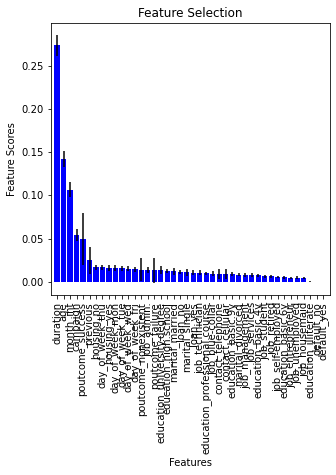

In [113]:
#FEATURE SCORE
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train,y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(1, figsize=(5,5))
plt.title("Feature Selection")
plt.bar(range(X_train.shape[1]), importances[indices],color="blue", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Feature Scores")
plt.show()

# Select k Best algorithm

In [114]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['age', 'duration', 'campaign', 'previous', 'month_int',
       'job_entrepreneur', 'job_retired', 'job_self-employed',
       'job_unemployed', 'default_no', 'loan_no', 'contact_cellular',
       'contact_telephone', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

# ExtraTreesRegressor

In [161]:
from sklearn.ensemble import ExtraTreesRegressor

In [162]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [163]:
print(model.feature_importances_)

[0.10934127 0.06404704 0.03743991 0.05829968 0.01239773 0.03425964
 0.02605081 0.01683692 0.06688853 0.28596224 0.0637469  0.02237644
 0.09988954 0.10246335]


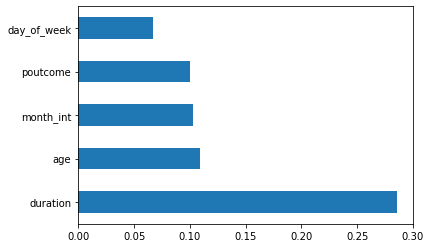

In [166]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

##  Recommendations
1. More appropriate timing

When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that March, September, October and December had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring.

2. Smarter marketing design

By targeting the right customers, the bank will have more and more positive responses, and the classification algorithms would ultimately eliminate the imbalance in the original dataset. Hence, more accurate information will be presented to the bank for improving the subscriptions. Meanwhile, to increase the likelihood of subscription, the bank should re-evaluate the content and design of its current campaign, making it more appealing to its target customers.

3. Better services provision

With a more granular understanding of its customer base, the bank has the ability to provide better banking services. For example, marital status and occupation reveal a customer's life stage while loan status indicates his/her overall risk profile. With this information, the bank can estimate when a customer might need to make an investment. In this way, the bank can better satisfy its customer demand by providing banking services for the right customer at the right time.